## Table of Contents
- [Introduction](#introduction)
   - [Importing packages](#importing)
- [Univariate exploration](#uni)
- [Bivariate exploration](#bivar)
  - [Short summary](#sum)
- [Multivariate exploration](#mult)
- [Additional plot](#add)


<a id='introduction'></a>
## Introduction

In this project I will be analizing Bay Wheels's trip public data from 2019 year. Bike share - is  `an affordable, accessible, and fun new transportation option` ([source](https://www.lyft.com/bikes/bay-wheels)) for all residents of the Bay Area offered by Lyft.

Each trip is anonymized and includes:

 - Trip Duration (seconds)
 - Start Time and Date
 - End Time and Date
 - Start Station ID
 - Start Station Name
 - Start Station Latitude
 - Start Station Longitude
 - End Station ID
 - End Station Name
 - End Station Latitude
 - End Station Longitude
 - Bike ID
 - User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
 - bike_share_for_all_trip
 - rental access method (mobile app or clipper (transit card))
 
 Data is divided by month,so we need some data wrangling to unite all pieces into one entire dataset. 

<a id='importing'></a>
### Importing necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
import warnings
from tqdm import tqdm
sns.set()
warnings.filterwarnings("ignore")
%matplotlib inline


In [6]:
os.chdir('archives')

In [8]:
#creating a list of all files in a current working directory
list_of_files = np.array(os.listdir())

In [9]:
# Creating mask to filter only .zip files
mask = [x.endswith('zip') for x in list_of_files]
only_zip = list_of_files[mask]

In [10]:
only_zip

array(['201901-fordgobike-tripdata.csv.zip',
       '201902-fordgobike-tripdata.csv.zip',
       '201903-fordgobike-tripdata.csv.zip',
       '201904-fordgobike-tripdata.csv.zip',
       '201905-baywheels-tripdata.csv.zip',
       '201906-baywheels-tripdata.csv.zip',
       '201907-baywheels-tripdata.csv.zip',
       '201908-baywheels-tripdata.csv.zip',
       '201909-baywheels-tripdata.csv.zip',
       '201910-baywheels-tripdata.csv.zip',
       '201911-baywheels-tripdata.csv.zip',
       '201912-baywheels-tripdata.csv.zip'], dtype='<U34')

For futher analysis it is  better to write some function

In [11]:
def union_all(list_of_zips) -> pd.DataFrame:
    """
    Small function to concatenate .csv files
    
    Parameters:
    ----------
    list_of_zips : numpy array object
        numpy array  with .zip files
    """
    
    lst_df = []
    print(f'There are {list_of_zips.shape[0]} elements in the array')
    print('Iterating over array...')
    for name in tqdm(list_of_zips):
        zip_name = name
        file_name = zip_name[:-4]
        with zipfile.ZipFile(zip_name) as file:
            with file.open(file_name) as data:
                df = pd.read_csv(data)
                lst_df.append(df)
    result = pd.concat(lst_df)
    return result


In [12]:
df = union_all(only_zip)

  0%|                                                   | 0/12 [00:00<?, ?it/s]

There are 12 elements in the array
Iterating over array...


100%|██████████████████████████████████████████| 12/12 [00:11<00:00,  1.04it/s]


In [7]:
df.shape

(2506983, 15)

In [8]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506983 entries, 0 to 150101
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
dtypes: float64(6), int64(2), object(7)
memory usage: 306.0+ MB


In [10]:
df.isnull().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id             80734
start_station_name           80133
start_station_latitude           0
start_station_longitude          0
end_station_id               82902
end_station_name             82350
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip     243259
rental_access_method       2386145
dtype: int64

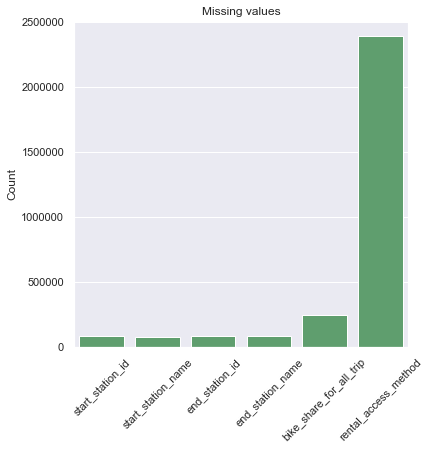

In [11]:
# it is always better visually
plt.figure(figsize=(6,6))
na_counts = df[['start_station_id', 'start_station_name', 'end_station_id', 
                'end_station_name','bike_share_for_all_trip', 'rental_access_method']] .isnull().sum()
base_color = sns.color_palette()[2]
ax = sns.barplot(na_counts.index.values, na_counts, color = base_color)
ax.set(title = 'Missing values',ylabel = 'Count')
for item in ax.get_xticklabels():
    item.set_rotation(45)


There is some missing information, though it is not that crucial here, except for the access method : we are unable to say what is the most convinient way to rent a bike for most of the people. As for the rest columns missing values  are acceptable.

I think it is a good idea to replace those NaNs with some informative text

In [12]:
df[['start_station_name']] = df[['start_station_name']].replace(np.nan, 'no name for this station', regex=True)
df[['end_station_name']] = df[['end_station_name']].replace(np.nan, 'no name for this station', regex=True)

Can see some columns are in inappropriate format, let's fix it.

In [13]:
df['start_time'] = pd.to_datetime(df['start_time'],yearfirst = True)
df['end_time'] = pd.to_datetime(df['end_time'],yearfirst = True)

Print some information to make sure I did everything right

In [14]:
df['start_time'].dt.month.max()

12

In [15]:
df['start_time'].dt.month.min()

1

In [16]:
np.unique(df['start_time'].dt.month)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

Each buisness has it's own values, and the goal of every data analysis is to reveal some patterns to use it to maximize the revenue. In this dataset I will try to show some visuals to understand which stations people use the most, what has an impact on trip duration and here I can even make a use of latitudes and longitudes of the stations. So, let's start off with some of the variables investigation.

<a id='uni'></a>
## Univariate Exploration

In this section, I will get acquainted with the data and try to describe all the variables in our dataset

In [17]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN


Let's look on duration, one of the most crucial variables

In [18]:
df[['duration_sec']].describe()

,duration_sec
count,2.506983e+06
mean,8.076483e+02
std,1.974714e+03
min,6.000000e+01
25%,3.590000e+02
50%,5.710000e+02
75%,8.870000e+02
max,9.121100e+05


It may be better to convert to minutes

In [19]:
df_m = df[['duration_sec']]/60
df_m.describe()

,duration_sec
count,2.506983e+06
mean,1.346081e+01
std,3.291190e+01
min,1.000000e+00
25%,5.983333e+00
50%,9.516667e+00
75%,1.478333e+01
max,1.520183e+04


On average the rent lasts for 1.34 minutes. Maximal value is 15201 minutes or 10.5 days.

Move on the next variable. Start station name. Due to a huge amount of stations, I will plot only first 15 the most frequent in the dataset


In [20]:
df['start_station_name'].nunique()

447

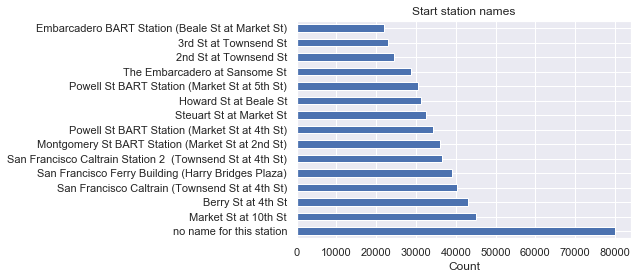

In [21]:
df['start_station_name'].value_counts()[:15].plot(kind = 'barh')
plt.title('Start station names')
plt.xlabel('Count');

A lot of missing names, at least we have coordinates to plot locations of those stations

Now,let's look on first 15 end station names

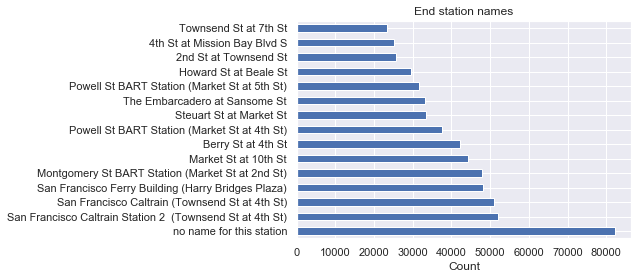

In [22]:
df['end_station_name'].value_counts()[:15].plot(kind = 'barh')
plt.title('End station names')
plt.xlabel('Count');

Speaking only about known names, the majority of people start at `Market St at 10th St` and finish their trip at `San Francisco Caltrain Station 2`. So, probaly these people use bikes just to get to the train station from work to home or in the opposite direction. Let's check the average time during this trip

In [23]:
# I decided to write separate expressions to not to make the line too long
start = 'start_station_name == "Market St at 10th St"'
end = 'end_station_name == "San Francisco Caltrain Station (King St at 4th St)"'
conc_symbol = ' & '

In [24]:
query = start + conc_symbol + end
df.query(query)['duration_sec'].mean()/60

13.060740740740739

Only 13 minutes! Good morning journey (or evening) especially during the summer.

If I right about the job trips, we will see peaks at morning and evening hours.

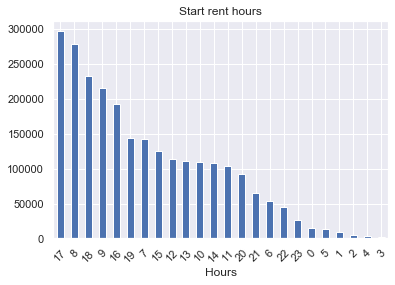

In [25]:
ax = df['start_time'].dt.hour.value_counts().plot(kind = 'bar')
plt.title('Start rent hours')
plt.xlabel('Hours')
for item in ax.get_xticklabels():
    item.set_rotation(45);

And yes morning and evening hours are buisy,that's make a sense,but of course some individuals rent a bike to explore the local area and other activities, not just for riding to work.
 Now let's look on the end rent hours


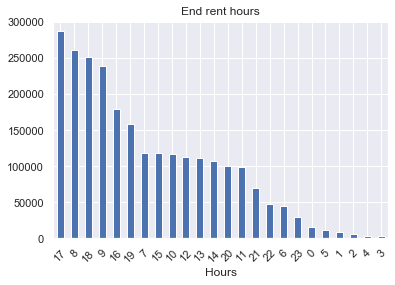

In [26]:
ax = df['end_time'].dt.hour.value_counts().plot(kind = 'bar')
plt.title('End rent hours')
plt.xlabel('Hours')
for item in ax.get_xticklabels():
    item.set_rotation(45);

It was expected, here we have a similar bars and that makes a sense : you end your trip either after back from work in the evening or during yor way to work in the morning.

And waht about  special social programm with discounts? Is it popular?

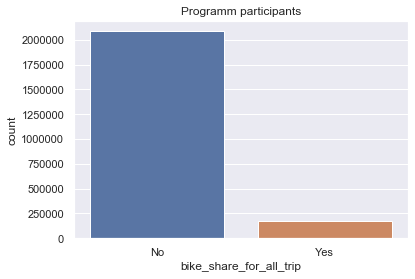

In [27]:
ax = sns.countplot(df['bike_share_for_all_trip'])
ax.set(title = 'Programm participants');

As stated on the main site : `Bay Area residents who qualify for CalFresh, SFMTA Lifeline Pass, or PG&E CARE utility discount are eligible to join our Bike Share for All program for 5$ for the first year`. Obviously, this special programm is not for what people rent a bike, but instead, useful option.

And as for access method,again, we can't trust this data - there are lots of missing values,nevertheless the most of the  people probably would choose app rather than clipper, I think.

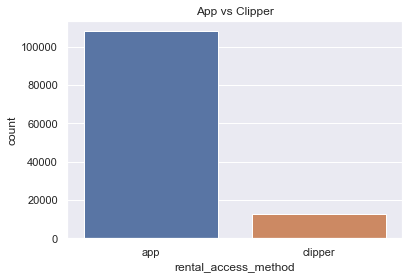

In [28]:
sns.countplot(df['rental_access_method'])
plt.title('App vs Clipper');

What about user_type?

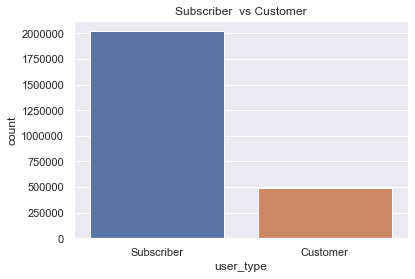

In [29]:
sns.countplot(df['user_type'])
plt.title('Subscriber  vs Customer');

Subscription is always beneficial, especially if you rent a bike everyday, so it is not surprising to have customers as a majority.

For other columns such as `start_station_id`,`end_station_id`,`bike_id` - they are not useful in our analysis, so for futher analisys it is better to drop these variables

<a id='bivar'></a>
## Bivariate Exploration

Our main goal is to find some relations between duration, say  our target and other variables, maybe to do some feature engineering, to reveal what lies behind behavoiur of the  people.

In [30]:
# For further analysis I separate main data to keep it unchanged
df_n = df.copy()
df_n['duration_min'] = df_n['duration_sec']/60
df_n.drop(['start_station_id','end_station_id','bike_id','duration_sec'], axis=1, inplace=True)

For every month I want to plot a scatter to see what kind of relations are between duration and day of the month.

In [31]:
sns.set_style("ticks")

In [32]:
df_n['day'] = df_n['start_time'].dt.day

In [33]:
def plot_bivariate(dataframe,kind,x_var,y_var,stop_num) -> None:
    """
    Helper function to plot relations between two variables
    for the whole year
    
    Parameters : 
    -----------
    dataframe : pandas Dataframe
        DataFrame to plot; each column is variable
        and each row is an observation.
    kind : str, replot, violin
        type of plot to draw
    x_var : str
        variable name on x-axis 
    y_var : str
        variable name on y-axis
    stop_num : int
        parameter to control number of occurrences in dataframe, 
        use with violin plot
    """
    
    months = ['January','February','March','April','May','June',
              'July','August','September','October','November','December']
    plt.figure(figsize=(16,13))
    if kind == 'regplot':
        for num, month in enumerate(months, 1):
            data = dataframe[dataframe['start_time'].dt.month == num]
            plt.subplot(3, 4, num) 
            plt.title(month)
            sns.regplot(data=data, x=x_var, y=y_var, fit_reg = False)
        plt.tight_layout()
        sns.despine()
    elif kind == 'violin':
        for num, month in enumerate(months, 1):
            data = dataframe[dataframe['start_time'].dt.month == num]
            data.sort_values(by='duration_min',ascending = False,inplace = True)
            data = data.iloc[:stop_num]
            plt.subplot(3, 4, num) 
            plt.title(month)
            sns.violinplot(x=x_var,y=y_var,data=data ,inner='quartile')
        plt.tight_layout()
        sns.despine()
    elif kind == 'swarm':
        for num, month in enumerate(months, 1):
            data = dataframe[dataframe['start_time'].dt.month == num]
            data.sort_values(by='duration_min',ascending = False,inplace = True)
            data = data.iloc[:stop_num]
            plt.subplot(3, 4, num) 
            plt.title(month)
            sns.swarmplot(x=x_var,y=y_var,data=data)
        plt.tight_layout()
        sns.despine()
    
        
    

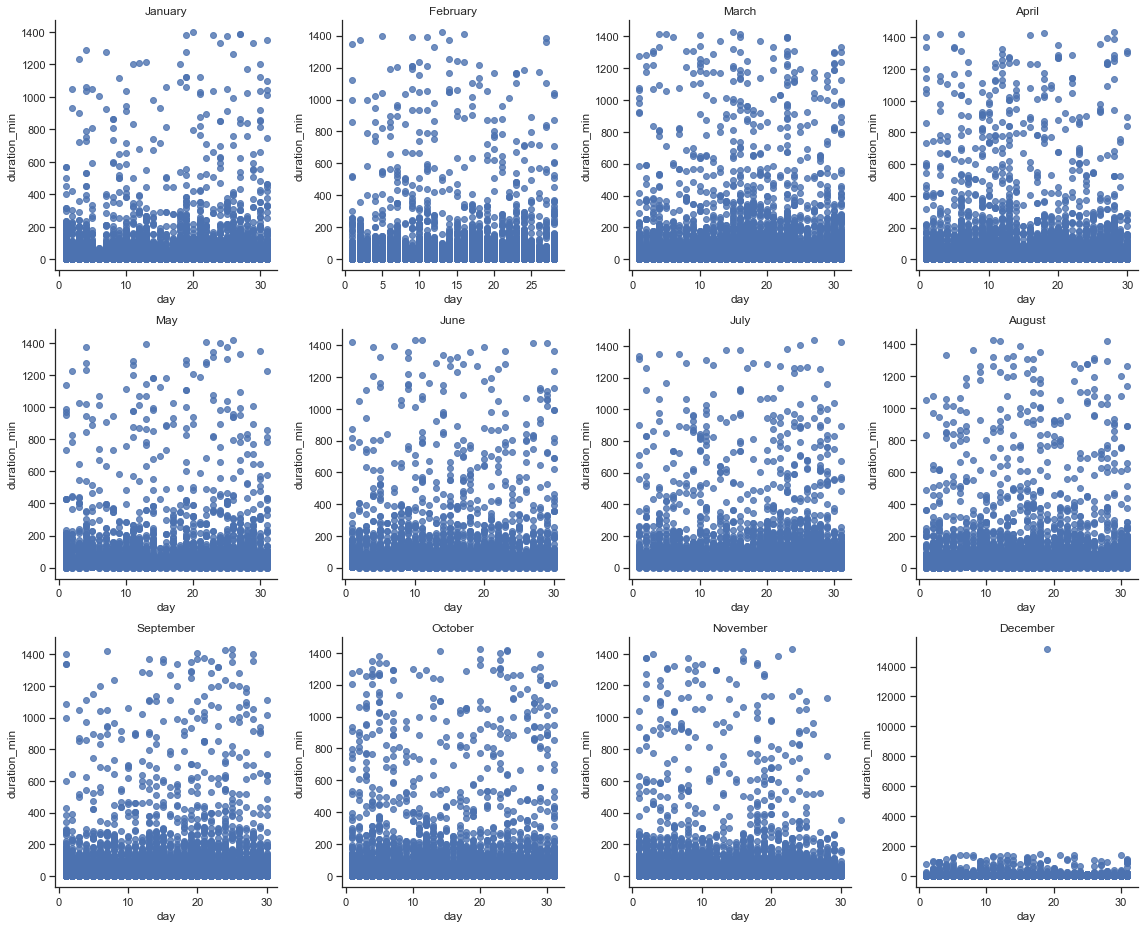

In [34]:
plot_bivariate(df_n,kind='regplot', x_var='day', y_var='duration_min', stop_num=None)

It is pretty dense during the whole year, except for December, looks like we have a record in December, 15000 minutes or so and there is an abrupt drop in December,probably because of the weather.

And who is more active : customer or subscriber? We can answer this question with violin plot

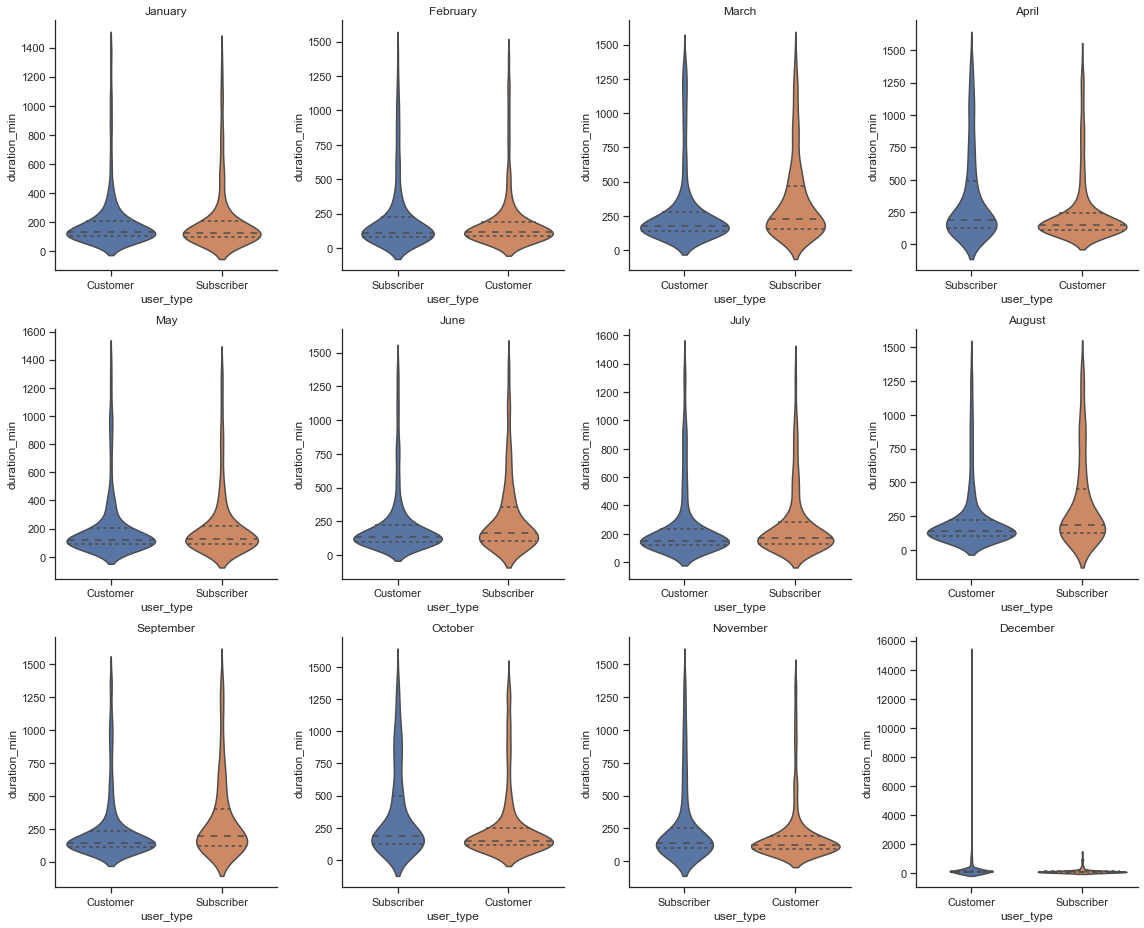

In [35]:
plot_bivariate(dataframe=df_n,kind='violin',x_var='user_type', y_var='duration_min',stop_num = 1500)

Most of the data points are clustered in a range from 0 to 200, as was seen in scatter plot, the median for every month is almost the same, and both customer and subscribers have lots of outliers (if I increase the `stom_num` parameter, we will see more and more outliers), looks like customers have longer rent time, which would be surprising , let's check it.

In [36]:
df_n.groupby('user_type')['duration_min'].agg(np.mean)

user_type
Customer      22.577449
Subscriber    11.269486
Name: duration_min, dtype: float64

Subscribers generally rent for  shorter time, that is because they ride for short distances,form station to station, whereas customers rent a bike to explore the area or other activities

By the way, to whom belongs the record of rent time?

In [37]:
max_v = df_n['duration_min'].max()
df_n[df_n['duration_min'] == max_v]

,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,rental_access_method,duration_min,day
124395,2019-12-19 23:15:36,2019-12-30 12:37:26,no name for this station,37.323757,-121.878614,no name for this station,37.327656,-121.868598,Customer,NaN,app,15201.833333,19


It is a customer, interesting that happened during the winter time within 10 days.
What if we drop this outlier and see how our mean change?

In [38]:
df_exp = df_n.drop(index=124395)

In [39]:
df_exp.groupby('user_type')['duration_min'].mean()

user_type
Customer      22.546206
Subscriber    11.269491
Name: duration_min, dtype: float64

Some decimals changed,in general everything is the same

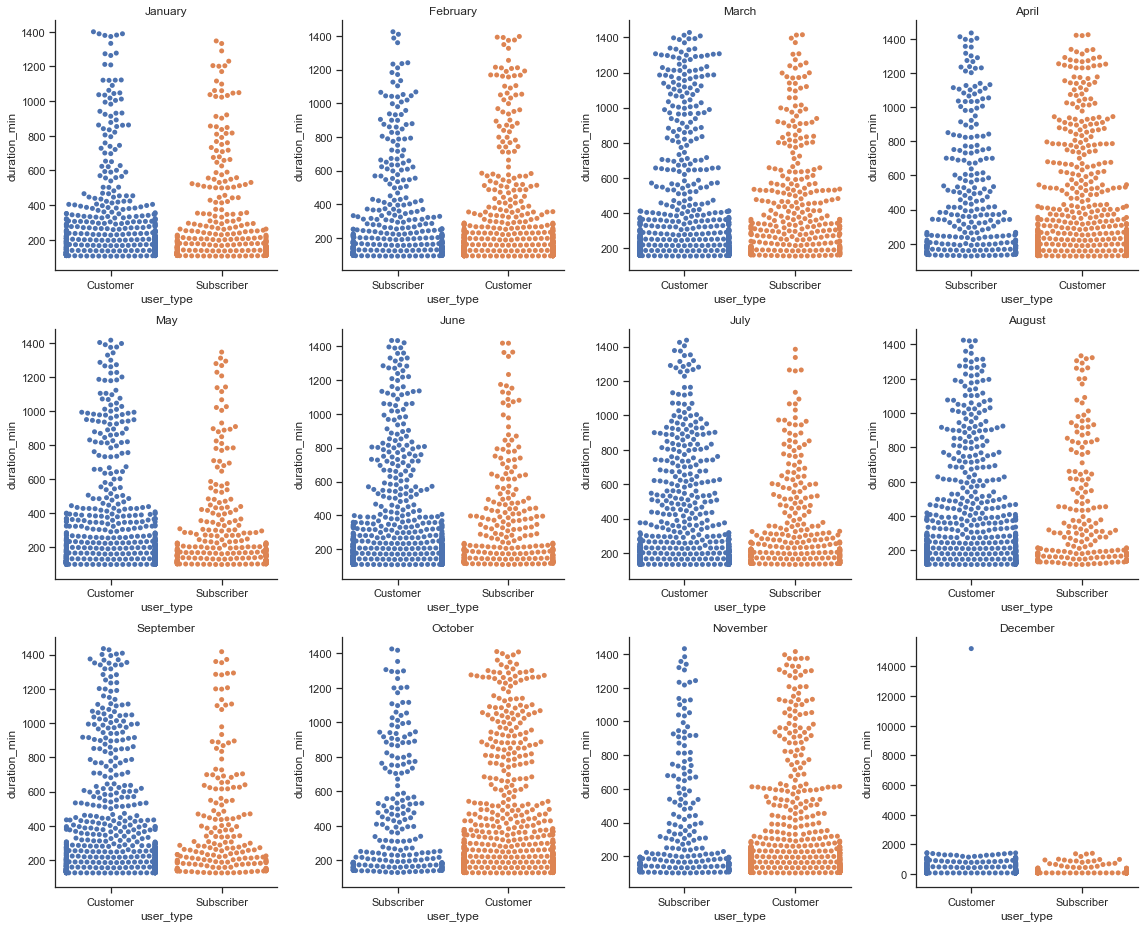

In [40]:
plot_bivariate(dataframe=df_n,kind='swarm',x_var='user_type', y_var='duration_min',stop_num = 1000)

Swarm plot shows us the ditribution of points and similar to violinplot,but here our duration range is clearly from 100 to 400 minutes - the most dence areas, meaning for which time people prefer rent a bike the most.

In [49]:
df_n['start_day'] = df_n['start_time'].dt.day_name()

That was for duration for every month. But it is also intersting to catch some trend amongst all days of the week.

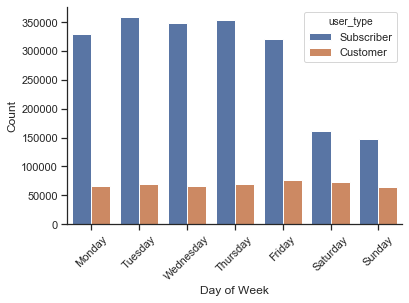

In [50]:
order = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df_n, x='start_day', hue='user_type', order = order);
plt.xlabel('Day of Week');
plt.ylabel('Count')
plt.xticks(rotation = 45)
sns.despine();

in our dataset there are much more subscribers than customers overall, but here we can see a drop in demand among cutomers, thst is probably because they use bikes to get to the job, whereas customers are more active during weekends.

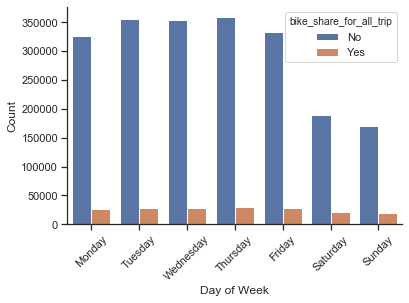

In [51]:
sns.countplot(data=df_n, x='start_day', hue='bike_share_for_all_trip', order = order);
plt.xlabel('Day of Week');
plt.ylabel('Count')
plt.xticks(rotation = 45)
sns.despine();

Special bike share programm is not very popular, here we can see a slight growth on Thursday and Friday.

<a id='sum'></a>
### Short summary

Subscribers use bikes more often than customers.Subscribers use the bike rent system to get to their workplace thus most trips were on work days (Mon-Fri) during rush hours (when going to work in the morning and getting off work in the afternoon), whereas customers tend to ride for fun in the afternoon or early evenings over weekends. On the other hand mean rent time is much higher for customers rathen then subscribers (record belongs to customer)



<a id='mult'></a>
## Multivariate Exploration

Again, we are intersted in keeping our subscribers and not dissapointing our customers. So let's visualize some info about them

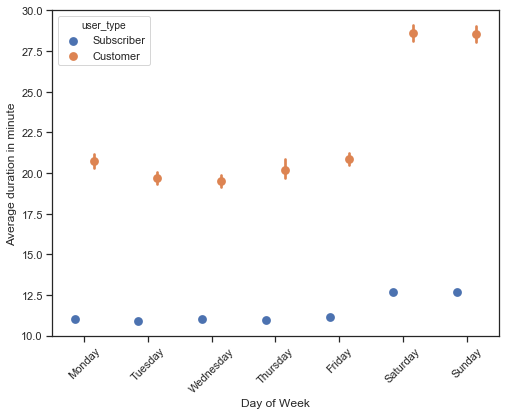

In [52]:
plt.figure(figsize=(8,6))
sns.pointplot(data=df_n, x='start_day', y='duration_min', hue='user_type', dodge=0.3, linestyles="",order = order);
plt.xlabel('Day of Week');
plt.ylabel('Average duration in minute')
plt.xticks(rotation=45);

Here we can that on average customers and subscribers are more active on weekdays, but before we thought the opposite, intersting insight, let's check it out

In [53]:
df_n.groupby(['start_day','user_type'])['duration_min'].mean()

start_day  user_type 
Friday     Customer      20.854134
           Subscriber    11.165996
Monday     Customer      20.754642
           Subscriber    11.044882
Saturday   Customer      28.620900
           Subscriber    12.678827
Sunday     Customer      28.518704
           Subscriber    12.692276
Thursday   Customer      20.193939
           Subscriber    10.943545
Tuesday    Customer      19.690423
           Subscriber    10.932461
Wednesday  Customer      19.496073
           Subscriber    10.998890
Name: duration_min, dtype: float64

And yes, average time in both groups is higher on weekdays, especially in Customer group.

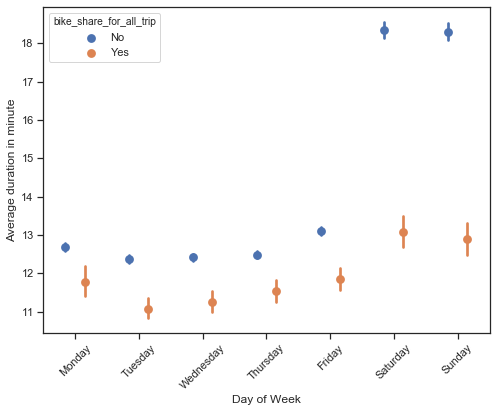

In [55]:
plt.figure(figsize=(8,6))
sns.pointplot(data=df_n, x='start_day', y='duration_min', hue='bike_share_for_all_trip', 
              dodge=0.3, linestyles="",order = order);
plt.xlabel('Day of Week');
plt.ylabel('Average duration in minute')
plt.xticks(rotation=45);

And bike share for all becomes popular on weekend and average duration is higher during the weekdays in this group of users,except for Saturday and Sunday

<a id='add'></a>
## Additional plot

There is an opportunity to make a use of coordinates of our stations to see visually how they are clustered on the map. Let's try to visualize our stations on the Bay Arey map.

In [56]:
#Separating data
df_exp = df_n[['start_station_name','start_station_latitude','start_station_longitude',
               'end_station_name','end_station_latitude','end_station_longitude','duration_min']]

In [57]:
df_exp['start_station_name'].value_counts()[:3].index

Index(['no name for this station', 'Market St at 10th St',
       'Berry St at 4th St'],
      dtype='object')

Let's look on to where people travel from the second most frequent in our dataset station

In [58]:
start_box = df_exp.query('start_station_name == "Market St at 10th St"').sort_values(
                   by='duration_min', ascending=False)[:10]

In [59]:
start_box.head()

,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,duration_min
140498,Market St at 10th St,37.776619,-122.417385,Bryant St at 2nd St,37.783172,-122.393572,1394.300000
27842,Market St at 10th St,37.776619,-122.417385,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,1384.516667
75326,Market St at 10th St,37.776619,-122.417385,Broderick St at Oak St,37.773063,-122.439078,1358.333333
98694,Market St at 10th St,37.776619,-122.417385,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,1305.033333
49205,Market St at 10th St,37.776619,-122.417385,Commercial St at Montgomery St,37.794231,-122.402923,1290.366667


In [60]:
# make a bound box, add up numbers to push the boundaries of the plot
bbox_end = (start_box['end_station_longitude'].min()-0.001, start_box['end_station_longitude'].max()+0.001,
        start_box['end_station_latitude'].min()-0.001, start_box['end_station_latitude'].max()+0.001)

[Image was downloaded here](https://www.openstreetmap.org/export#map=5/51.500/-0.100)

In [61]:
image = plt.imread('map_1.png')

In [62]:
# text for every point
text = start_box['end_station_name']
x = start_box['end_station_longitude'].values.tolist()
y = start_box['end_station_latitude'].values.tolist()
names = start_box['end_station_name'].values.tolist()

In [65]:
# customizing font
font = {'weight':'bold',
        'size':13}
matplotlib.rc('font', **font)

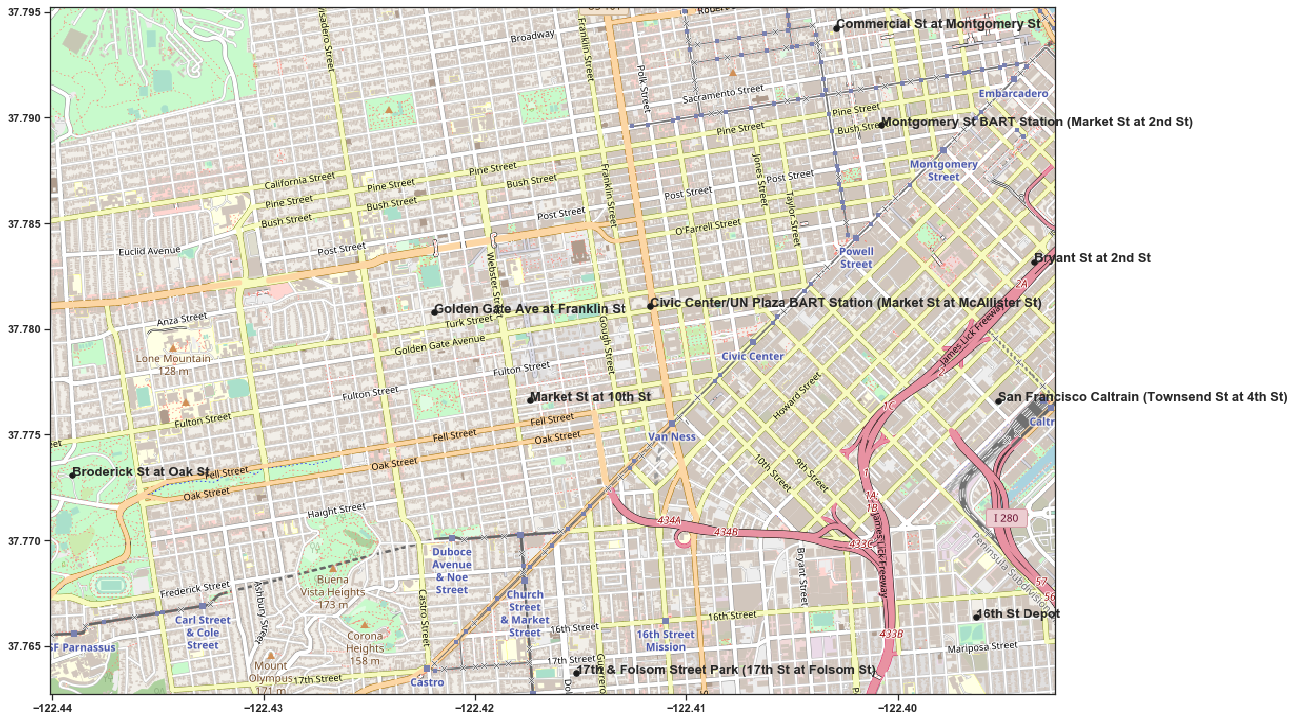

In [66]:
fig, ax = plt.subplots(figsize = (18,18))
ax.set_xlim(bbox_end[0], bbox_end[1])
ax.set_ylim(bbox_end[2], bbox_end[3])
plt.scatter(start_box['end_station_longitude'], start_box['end_station_latitude'], zorder=1, alpha=1, c='k', s=30)
ax.imshow(image, zorder=0, extent=bbox_end, aspect='equal')
for i, text in enumerate(names):
    ax.annotate(text, (x[i], y[i]))
plt.show()

Comparing names of the stations and streets seems like I did everything right and we see top 10 by duration end stations (not just top end destinations) from one of the most frequent  start stations in our dataset

Potentially, we could plot lots of points using these coordinats, but that will be very long list of pictures like above.
If we had data with revenues of different points we would be able to draw some conclusions how improve or keep customers as subscribers for our bike sharing programm.



Also we could find a distance between two stations, but that would be very rough, given that  our route is not direct from point to point.
